In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
dataset_file=r"K:\Summer 2024\INTA 6450 Data Analytics and Security\dataset_raw_withMaliciousURLCountColumnJ.csv"

In [12]:
df=pd.read_csv(dataset_file)
df.shape

(166, 312)

In [243]:
def wangler(df):
    str_columns=['ref','filename','title','publisherName','buildVersion','packageKey','appstoreApplicationKey']
    df_clean0=df.drop(columns=str_columns)
    df_clean1=df_clean0.dropna(axis=1,thresh=int(df_clean0.shape[0]*0.8))
    df_clean2=df_clean1.dropna(axis=0,thresh=int(df_clean1.shape[1]*0.8))
    df_clean3=df_clean2.dropna(axis=1).dropna(axis=0)
    # 删除单一数值的column
    df_clean4 = df_clean3.loc[:, df_clean3.nunique() > 1]
    # 删除一样的column
#     print(df_clean4.columns)
    columns=list(df_clean4.columns)
    for col in columns[::-1]:
        print(col)
        if '.' in col:
            print('yes')
            ori_col=col.split('.')[0]
            if ori_col in columns:
                if (df_clean4[ori_col]==df_clean4[col]).all():
                    columns.remove(col)
    print(columns)
    return df_clean4[columns]

In [244]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [245]:
df_clean=wangler(df)
df_clean
# (df_clean['keysize_check']==df_clean['keysize_check.1']).all()

application_overprivileged_check.1
yes
javascript_interface_check
dynamic_code_loading_check.1
yes
secure_random_check.1
yes
decompile_apk_check.1
yes
allow_backup_check.1
yes
decode_apk_check.1
yes
keysize_check.1
yes
dynamic_code_loading_check
leaked_data_in_files_zipcode
leaked_data_in_files_wifi_mac
leaked_data_in_files_username
leaked_data_in_files_surrounding_wifi_network_ssid
leaked_data_in_files_serial
leaked_data_in_files_localwifimac
leaked_data_in_files_imei
leaked_data_in_files_gpslongitude
leaked_data_in_files_gpslatitude
leaked_data_in_files_firstname
leaked_data_in_files_email
arbitrary_code_execution_probable
remote_code_execution
sensitive_data_http_username
sensitive_data_cert_validation
sensitive_data_http_password
zip_file_in_transit_check
sensitive_data_http_gpslatitude
cookie_without_secure_flag
cookie_without_httponly_flag
sensitive_data_http_android_id
leaked_logcat_data_zipcode
leaked_logcat_data_wifi_ip
leaked_logcat_data_surrounding_wifi_network_ssid
leaked_l

,score,Malicious URL count,android_target_sdk_min,uses_http,apk_leaked_data_sdcard,keysize_check,world_writable_files_check,world_readable_files_check,allow_backup_check,secure_random_check,...,leaked_data_in_files_gpslongitude,leaked_data_in_files_imei,leaked_data_in_files_localwifimac,leaked_data_in_files_serial,leaked_data_in_files_surrounding_wifi_network_ssid,leaked_data_in_files_username,leaked_data_in_files_wifi_mac,leaked_data_in_files_zipcode,dynamic_code_loading_check,javascript_interface_check
0,45.4,8.0,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
1,45.4,1.0,True,True,True,True,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
2,80.1,15.0,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,True,True
4,78.4,11.0,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,True,True
6,91.7,4.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,100.0,24.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
161,84.0,16.0,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,True
162,46.3,22.0,True,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
163,78.0,20.0,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,True,True


In [249]:
df_clean.to_csv('data_cleaned.csv',index=False)

In [246]:
# '.'in 'decode_apk_check.1'

True

In [96]:
# str_columns=['ref','filename','title','publisherName','buildVersion','packageKey','appstoreApplicationKey']
# df_clean0=df.drop(columns=str_columns)

# df_clean1=df_clean0.dropna(axis=1,thresh=int(df_clean0.shape[0]*0.8))
# df_clean2=df_clean1.dropna(axis=0,thresh=int(df_clean1.shape[1]*0.8))
# df_clean3=df_clean2.dropna(axis=1).dropna(axis=0)

# df_clean4 = df_clean3.loc[:, df_clean3.nunique() > 1]
# df_clean3.nunique() 
# # df_clean4.head()

In [142]:
x_columns=list(df_clean.columns)

In [143]:
if 'score' in x_columns:
    x_columns.remove('score')


In [144]:
y=df_clean['score']

In [145]:
x=df_clean[x_columns]

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [149]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [151]:
y

0       45.4
1       45.4
2       80.1
4       78.4
6       91.7
       ...  
160    100.0
161     84.0
162     46.3
163     78.0
165     83.7
Name: score, Length: 141, dtype: float64

[0.10824221 0.17778291 0.23637501 0.28991624 0.3369803  0.37979724
 0.42128684 0.45893167 0.49233433 0.52541327 0.55629524 0.58458283
 0.61106124 0.63648146 0.66010764 0.68192276 0.70337257 0.72404435
 0.74333756 0.7618983  0.77991803 0.7966147  0.81228202 0.82786625
 0.84214599 0.85596576 0.86901419 0.88105573 0.89250157 0.90373263
 0.91369019 0.92299131 0.93172466 0.94034171 0.94840527 0.95512379
 0.96135758 0.96732235 0.97301219 0.97830833 0.98280388 0.98676623
 0.98998159 0.99287967 0.99516389 0.99705548 0.99866606 0.99938422
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


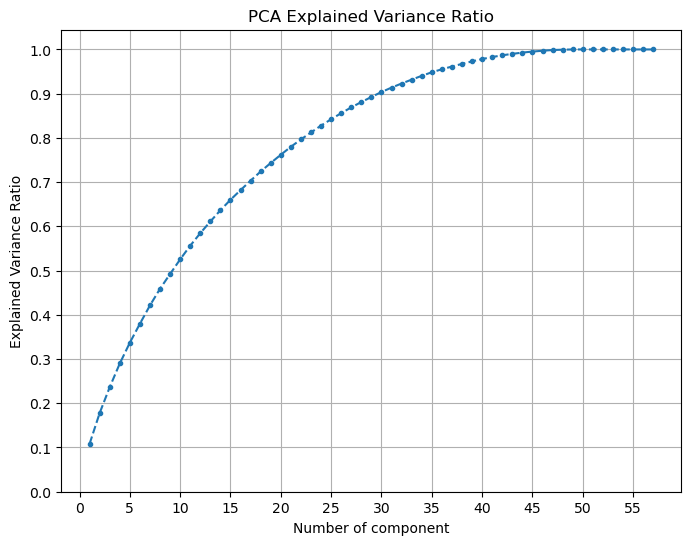

In [219]:

from matplotlib.ticker import MultipleLocator
pca = PCA()
pca.fit(X_scaled)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_explained_variance)
# 绘制累积解释方差比例图
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.', linestyle='--')
plt.xlabel('Number of component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.yticks(np.arange(0, 1.1, 0.1) )
plt.xticks(np.arange(0, 60, 5) )
plt.grid(True)
plt.show()

In [220]:
len(x_columns)

57

In [221]:
# pca2 = PCA(n_components=48)
# pca2.fit(X_scaled)

PCA(n_components=48)

In [222]:
# columns = x_columns
# for i, component in enumerate(pca.components_):
#     # 绝对值最大的索引
#     max_index = np.argmax(np.abs(component))
#     print(f"\n主成分 {i+1} 贡献最大的特征是: {columns[max_index]}")
# #     print(f"特征向量: {component}")
#     print(f"最大贡献值: {component[max_index]:.4f}")

# # 查看每个主成分解释的方差比例
# print("\n每个主成分解释的方差比例 (explained_variance_ratio_):")
# print(pca.explained_variance_ratio_)

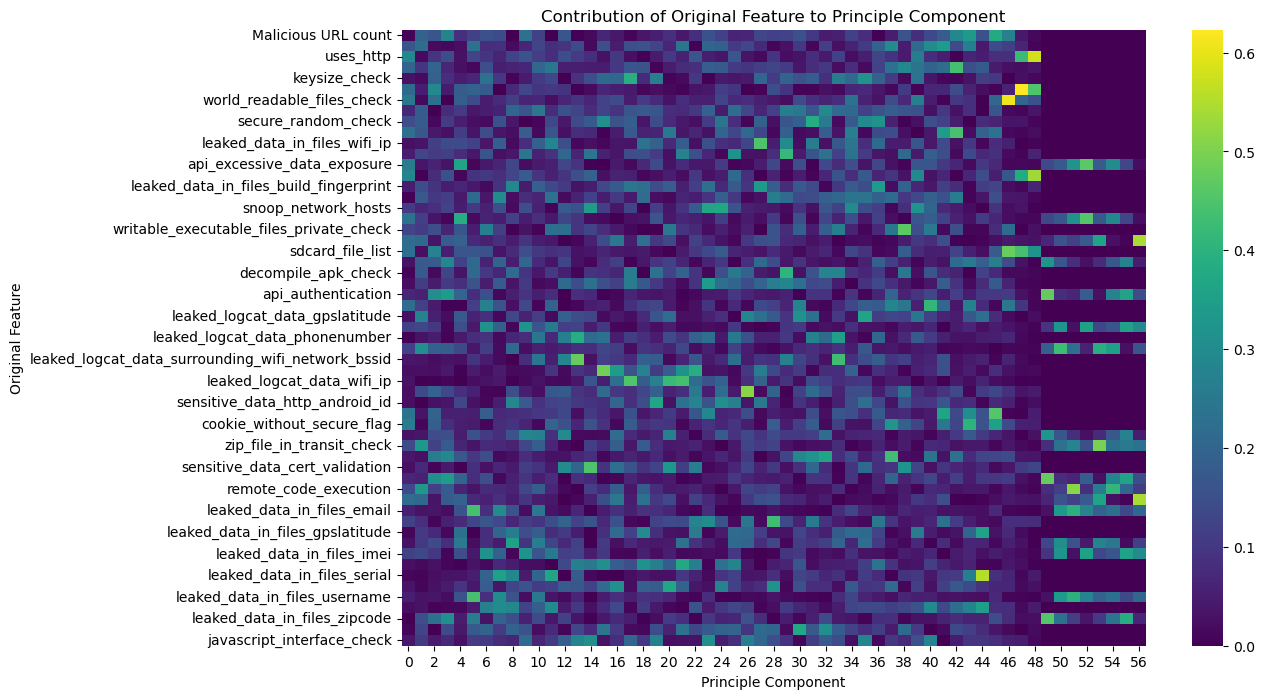

In [223]:
import seaborn as sns
components = np.abs(pca.components_)

# 创建一个DataFrame来存储成分矩阵
components_df = pd.DataFrame(components, columns=x_columns)

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(components_df.T, cmap='viridis')
plt.xlabel('Principle Component')
plt.ylabel('Original Feature')
plt.title('Contribution of Original Feature to Principle Component')
plt.show()

In [224]:
components_df['Sum'] = components_df.sum(axis=1)
components_df_sorted = components_df.sort_values(by='Sum', ascending=False)
sorted_feature_index = components_df_sorted.index
# print("按主成分总贡献从高到低排序的特征名称:")
# print(sorted_feature_names)

In [225]:
# components_df_sorted['Sum']

In [226]:
for i in sorted_feature_index:
    print(x_columns[i],components_df_sorted['Sum'][i])

leaked_data_in_files_android_id 6.243311304048043
sensitive_data_http_android_id 6.211708889092788
cookie_without_secure_flag 6.208837361003275
leaked_data_in_files_wifi_ip 6.131617875768177
writable_executable_files_check 6.089299677347418
world_readable_files_check 6.0882677911011
leaked_logcat_data_android_id 5.945307820307313
snoop_network_hosts 5.929697060462229
leaked_logcat_data_build_fingerprint 5.928925310214314
api_excessive_data_exposure 5.906435926420955
leaked_logcat_data_phonenumber 5.905503126607281
writable_executable_files_private_check 5.895866649115955
sensitive_data_http_password 5.879956766128563
keysize_check 5.807589813475578
allow_backup_check 5.80260658219683
leaked_logcat_data_surrounding_wifi_network_bssid 5.7971242411137185
sensitive_data_http_username 5.781134016168941
android_target_sdk_min 5.7682478039571
api_authentication 5.755252157467263
sensitive_data_cert_validation 5.747222374443414
leaked_logcat_data_wifi_ip 5.7222312072613475
cookie_without_httpo

In [248]:
# x_columns

In [247]:
# X_scaled

In [174]:
# plt.figure(figsize=(9,60))
# n_components_list = range(1,58)
# for i, n_components in enumerate(n_components_list):
#     pca = PCA(n_components=n_components)
#     X_pca = pca.fit_transform(X_scaled)
    
#     plt.subplot(20, 3, i + 1)
#     if n_components == 1:
#         plt.scatter(X_pca, np.zeros_like(X_pca), c=y, edgecolor='none', alpha=0.7, cmap=plt.get_cmap('viridis', 3))
# #         plt.xlabel('Principle Component 1')
#         plt.ylabel(' ')
#     else:
#         plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.7, cmap=plt.get_cmap('viridis', 3))
# #         plt.xlabel('Principle Component 1')
# #         plt.ylabel('Principle Component 2')
    
#     plt.title(n_components)
# #     plt.colorbar()
#     plt.grid()

# # plt.tight_layout()
# plt.show()